# EDA(Exploratory Data Analysis)

탐색적 데이터 분석: 그래프나 통계적인 방법으로 자료를 분석하는 과정.

# 필요한 모듈 import

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ex 1. iris 데이터셋

*   seaborn 패키지의  iris 데이터셋을 로드
*   iris 데이터 탐색 - 데이터프레임 일부 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수 빈도수
*   숫자 타입 변수(컬럼)들의 box plot
*   숫자 타입 변수(컬럼)들의 평균 막대 그래프
*   품종별 모든 연속형 변수들의 box plot
*   품종별 모든 연속형 변수들의 평균 막대 그래프
*   petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화
*   모든 연속형 변수들 간의 상관관계(산점도). Hint: `pairplot()`


In [24]:
iris = sns.load_dataset('iris')

In [25]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 숫자 타입 변수(numerical variables) 탐색

In [27]:
iris.petal_length.describe()

,petal_length
count,150.000000
mean,3.758000
std,1.765298
min,1.000000
25%,1.600000
50%,4.350000
75%,5.100000
max,6.900000


In [28]:
iris[['petal_length','petal_width']].describe()

,petal_length,petal_width
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [29]:
# 숫자 타입 변수들의 기술 통계량
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


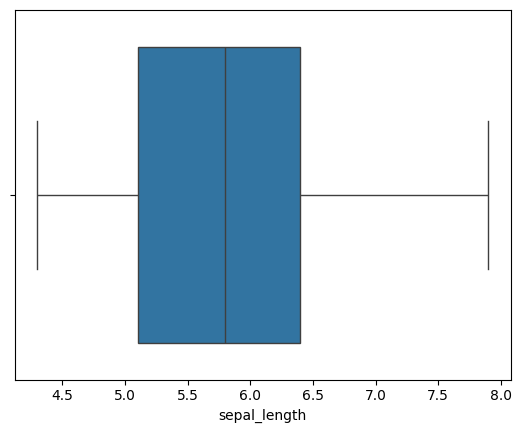

In [30]:
#숫자 타입 변수(컬럼)들의 box plot
sns.boxplot(data = iris, x = 'sepal_length')
plt.show()

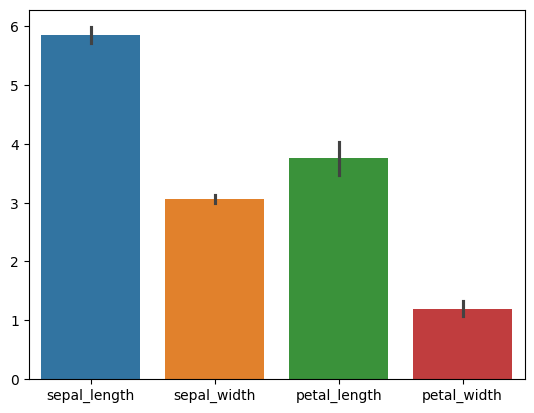

In [31]:
# (mean) bar plot
sns.barplot(data=iris)
plt.show()

In [32]:
print(iris.columns)
print(iris.columns[:4])     # 첫 4개의 컬럼 이름을 선택
print(iris.columns[:-1])    # 마지막 컬럼을 제외한 나머지 모든 컬럼 이름을 선택

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [33]:
# iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
iris[iris.columns[:-1]].mean()

,0
sepal_length,5.843333
sepal_width,3.057333
petal_length,3.758000
petal_width,1.199333


In [34]:
# 카테고리 변수의 빈도수
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


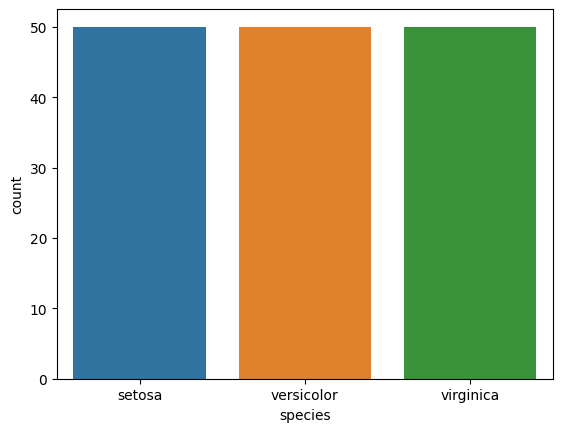

In [35]:
sns.countplot(data=iris, x='species', hue='species')
plt.show()

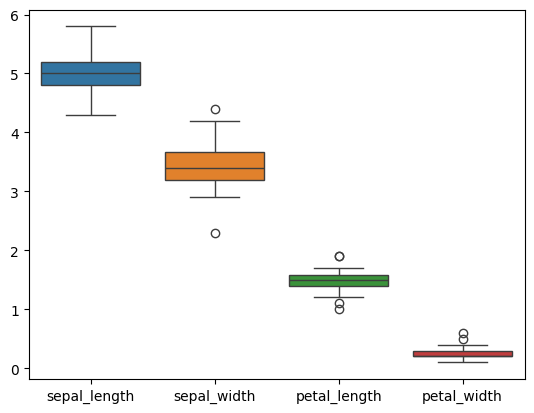

In [36]:
sns.boxplot(data = iris[iris.species == 'setosa'])
plt.show()

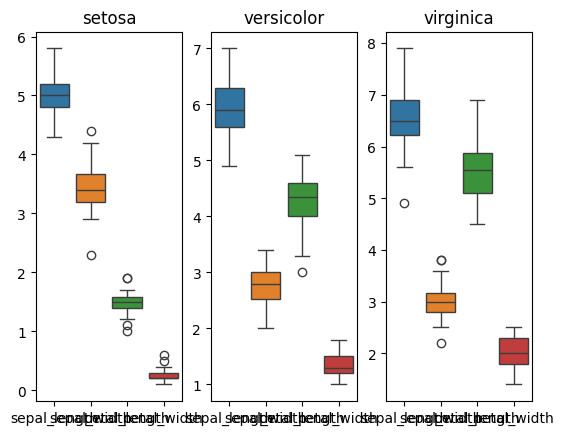

In [37]:
# 품종별 box plot
species = iris.species.unique()
fig, axes = plt.subplots(ncols = len(species))

for i, s in enumerate(species):
    data = iris[iris.species == s]
    sns.boxplot(data = data, ax = axes[i] )
    axes[i].set_title(s)

plt.show()

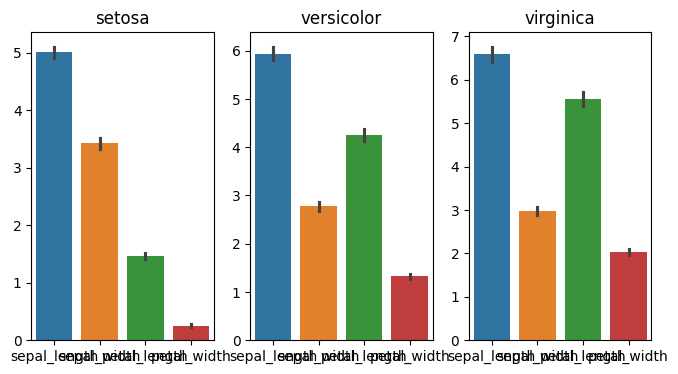

In [16]:
# 품종별 평균 막대 그래프
fig, axes = plt.subplots(ncols = len(species), figsize= (8,4))

for i , s in enumerate(species):
    data = iris[iris.species == s]
    sns.barplot(data = data, ax = axes[i])
    axes[i].set_title(s)

plt.show()


In [17]:
print(iris.columns)
print(iris.columns[:-1])

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [18]:
iris.groupby(by=['species'])[iris.columns[:-1]].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## scatter plot

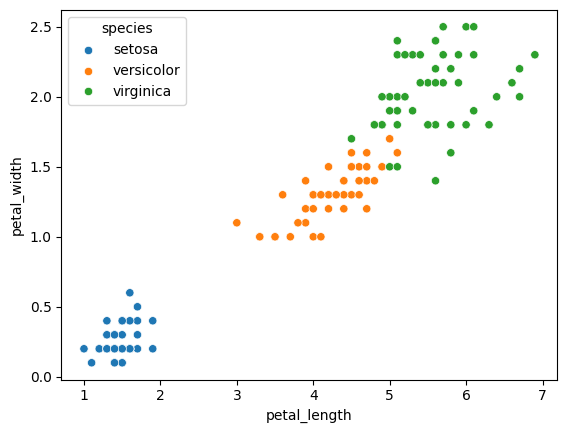

In [19]:
# petal_width ~ petal_length
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')
plt.show()

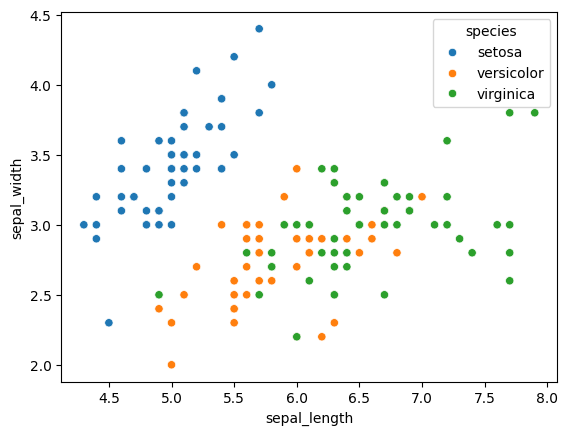

In [20]:
# sepal_width ~ sepal_length
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

## pair plot

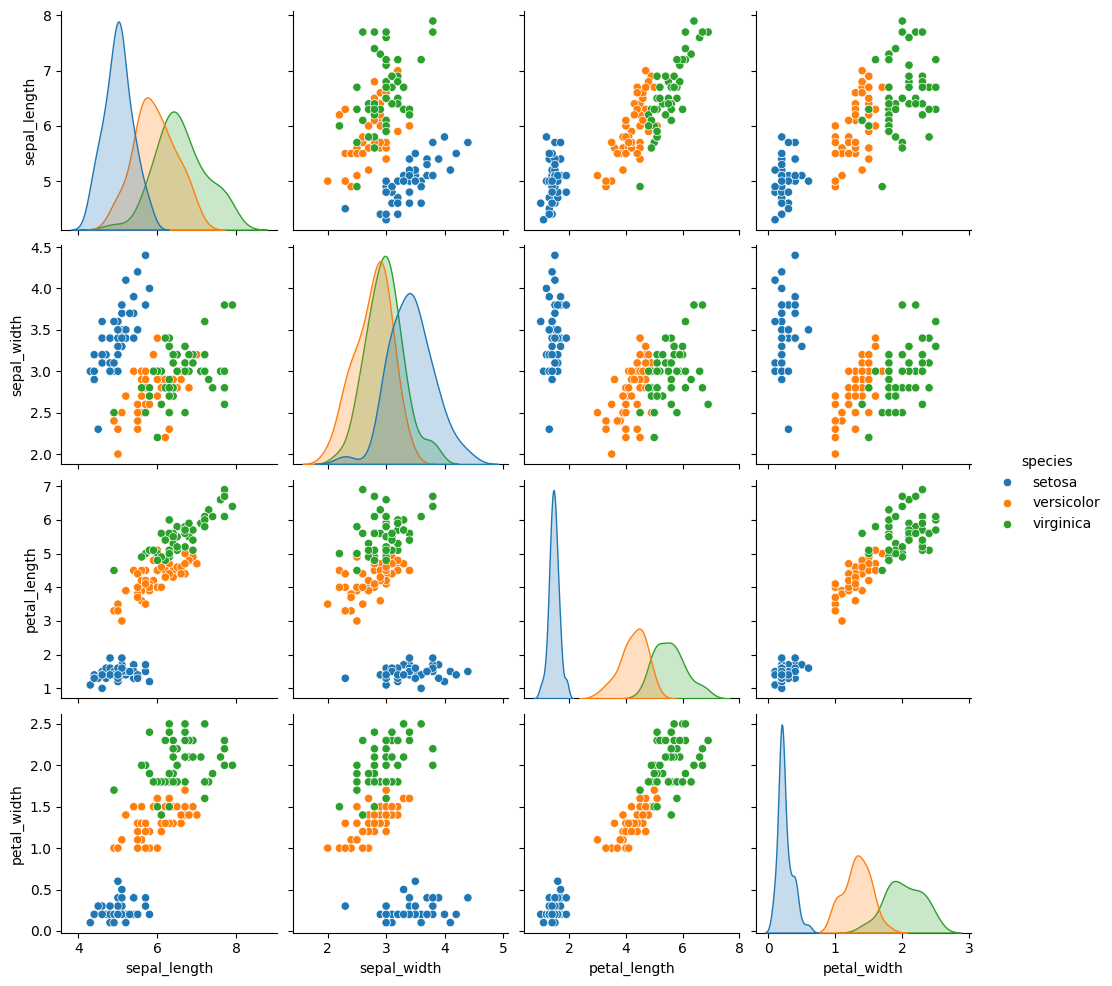

In [38]:
sns.pairplot(data = iris, hue = 'species')
plt.show()

# Ex 2. mpg 데이터셋

*   seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
*   DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
*   산점도
    *   mpg(연비) ~ displacement(배기량)
    *   2x2 모양의 subplot을 생성
        *   mpg ~ cylinders(실린더 개수)
        *   mpg ~ horsepower(마력)
        *   mpg ~ weight(무게)
        *   mpg ~ acceleration(가속도)
*   빈도수 막대 그래프
    *   cyliners 빈도수
    *   origin(자동차 생산 지역) 빈도수
    *   model_year(자동차 생산 연도) 빈도수
        *   선 그래프 가능?
    *   origin 별, cylinders 별 빈도수
*   통계량 막대 그래프 - 2개의 subplot 생성
    *   cylinders 별 mpg의 중앙값(median)
    *   origin 별 mpg의 중앙값

*   Box plot
    *   3개의 subplot을 생성
        *   mpg, displacement, weight box plot
    *   origin 별 mpg box plot
*   Histogram
    *   4개의 subplot을 생성
        *   mpg, displacement, weight, model_year histogram
*   Pair plot

## 데이터셋 준비

In [42]:
# mpg(mile per gallon): 자동차 연비
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [41]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [44]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [46]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [47]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [59]:
mpg.origin.value_counts()

,count
origin,
usa,249
japan,79
europe,70


In [61]:
mpg.name.value_counts()

,count
name,
ford pinto,6
ford maverick,5
amc matador,5
toyota corolla,5
amc hornet,4
...,...
amc concord dl,1
volkswagen rabbit l,1
mazda glc custom l,1


In [63]:
mpg.cylinders.value_counts()

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


In [64]:
mpg.model_year.value_counts()

,count
model_year,
73,40
78,36
76,34
82,31
75,30
80,29
79,29
81,29
70,29


## 산점도

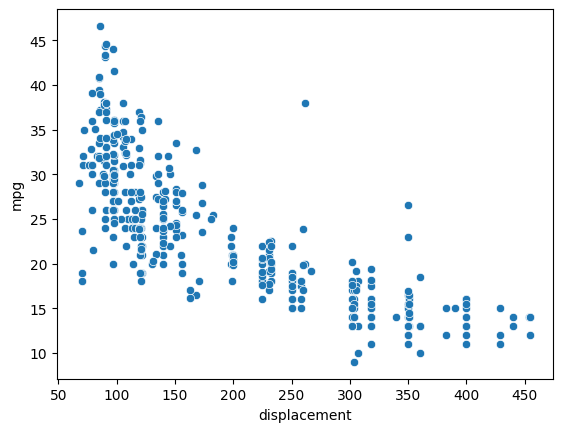

In [67]:
# mpg(연비) ~ displacement(배기량)
sns.scatterplot(data = mpg, x = 'displacement', y = 'mpg')
plt.show()

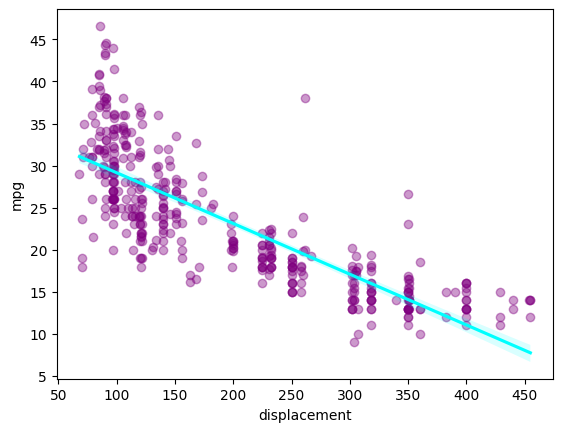

In [75]:
sns.regplot(data = mpg, x = 'displacement', y = 'mpg',
            scatter_kws = {'alpha' : 0.4,
                           'color' : 'purple'},
            line_kws= {'color': 'cyan'})
plt.show()

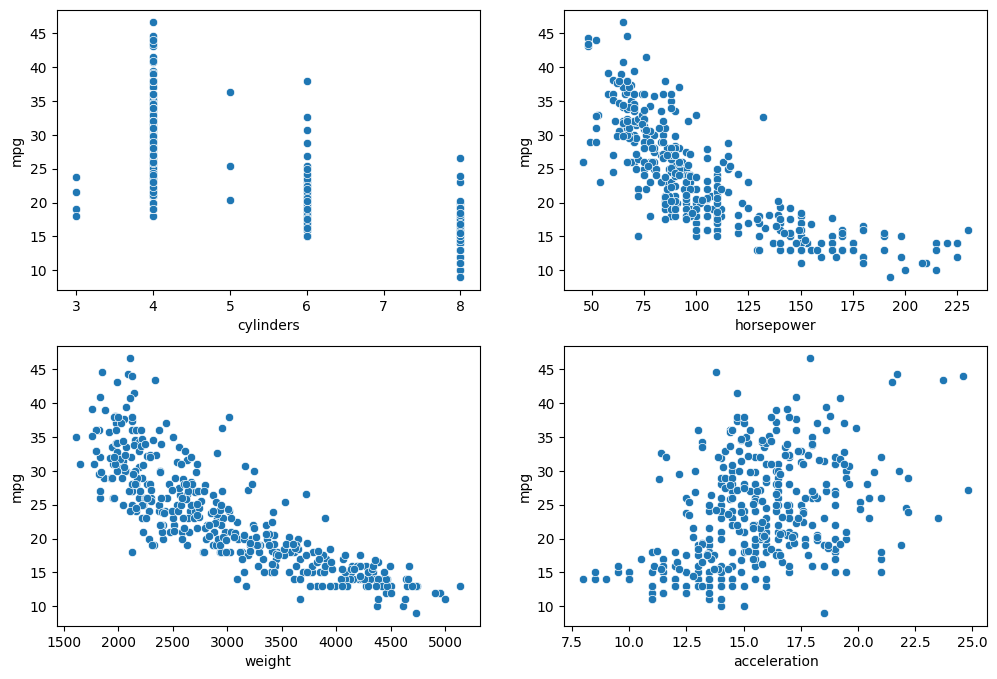

In [93]:
# 2x2 Axes를 생성하고, 산점도

fig , axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
# print(axes) : 2차원 ndarray
sns.scatterplot(data = mpg, x = 'cylinders', y = 'mpg', ax = axes[0,0])
sns.scatterplot(data = mpg, x = 'horsepower', y = 'mpg', ax = axes[0,1])
sns.scatterplot(data = mpg, x = 'weight', y = 'mpg', ax = axes[1,0])
sns.scatterplot(data = mpg, x = 'acceleration', y = 'mpg', ax = axes[1,1])

plt.show()

In [97]:
# 상관계수 (correlation coefficient)
# pd.DataFrame.corr() 메서드의 method 파라미터: 상관계수를 계산하는 방법(pearson(기본값), kendall, spearman)
mpg[['mpg', 'displacement', 'horsepower','weight','acceleration']].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804203,-0.778427,-0.831741,0.420289
displacement,-0.804203,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.689196,-0.417457,1.000000


In [99]:
mpg[['mpg', 'displacement', 'horsepower','weight','acceleration']].corr(method = 'spearman')

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.855692,-0.853616,-0.874947,0.438677
displacement,-0.855692,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.496512,-0.658142,-0.404550,1.000000


### 지역, 실린더 개수를 산점도에 표현

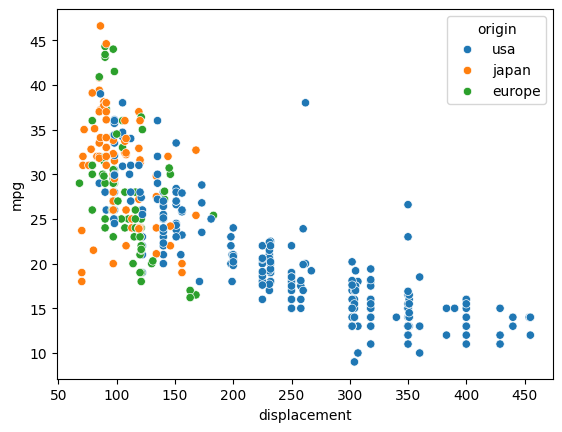

In [101]:
sns.scatterplot(data = mpg, x = 'displacement', y = 'mpg', hue = 'origin')
plt.show()

<Axes: xlabel='displacement', ylabel='mpg'>

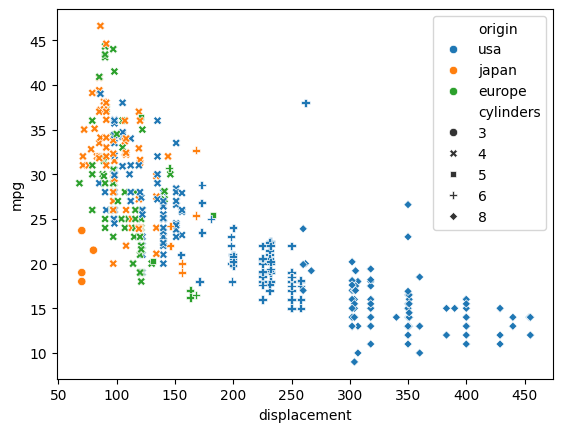

In [107]:
sns.scatterplot(data = mpg, x ='displacement', y = 'mpg', hue = 'origin', style = 'cylinders')

In [109]:
fig = px.scatter(data_frame= mpg, x = 'displacement', y = 'mpg', color = 'origin', symbol = 'cylinders')
fig.show()

## count plot

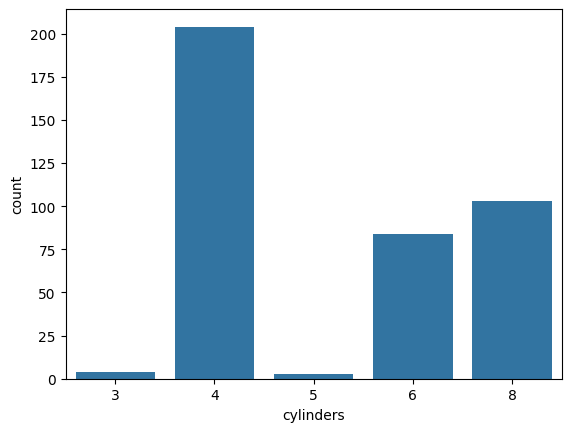

In [112]:
sns.countplot(data = mpg, x = 'cylinders')
plt.show()

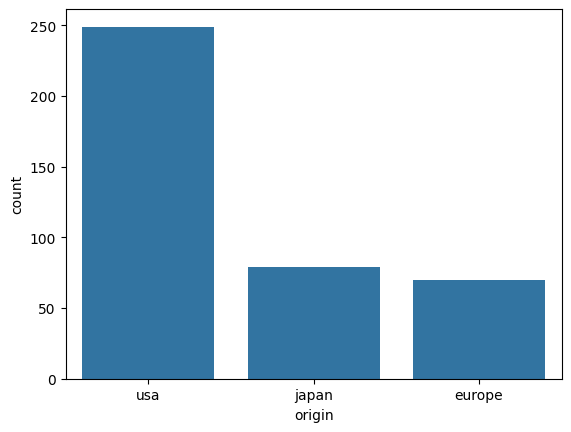

In [115]:
sns.countplot(data =mpg, x = 'origin')
plt.show()

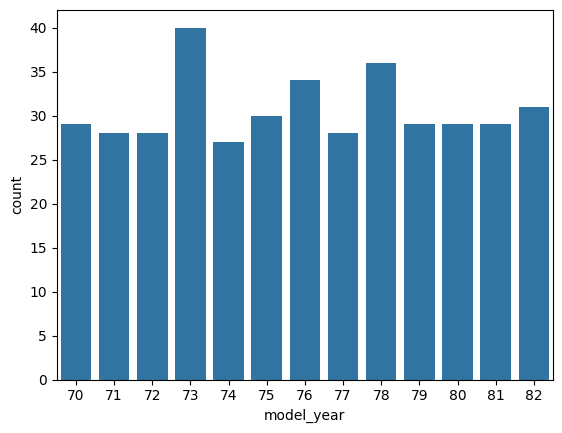

In [116]:
sns.countplot(data= mpg, x = 'model_year')
plt.show()

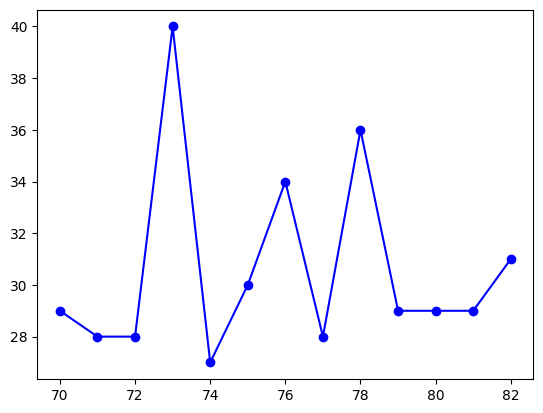

In [124]:
year_count = mpg.model_year.value_counts().sort_index()
# print(year_count)
plt.plot(year_count.index, year_count. values,'bo-')
plt.show()

# **다시들어보기. 졸아서 못들음**

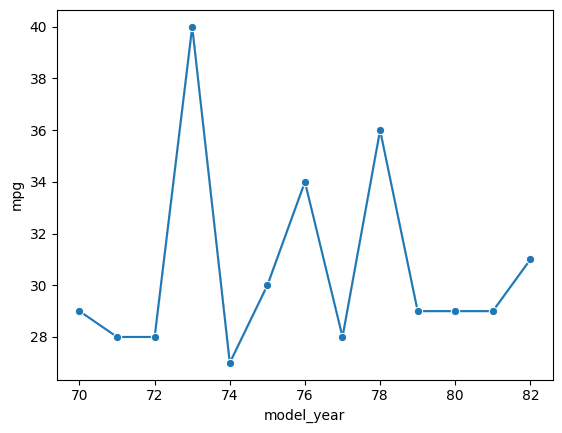

In [127]:
sns.lineplot(data = mpg, x = 'model_year', y = 'mpg', estimator = 'size', marker = 'o')
plt.show()

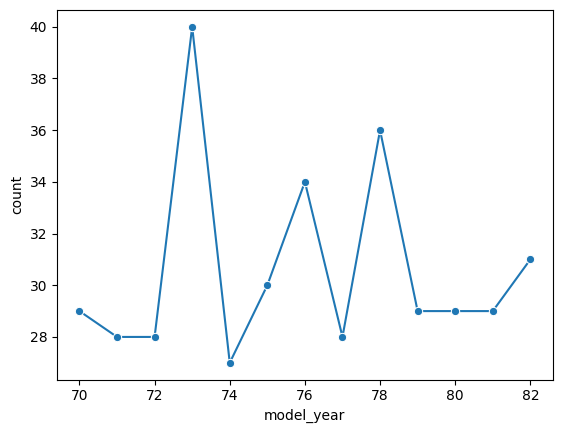

In [128]:
sns.lineplot(data = year_count, marker = 'o')
plt.show()

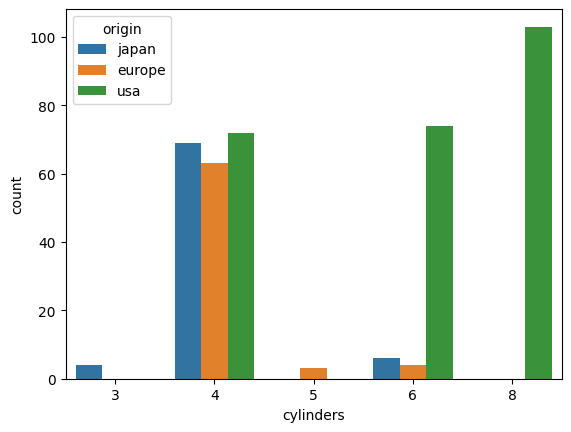

In [130]:
sns.countplot(data = mpg, x = 'cylinders', hue = 'origin')
plt.show()

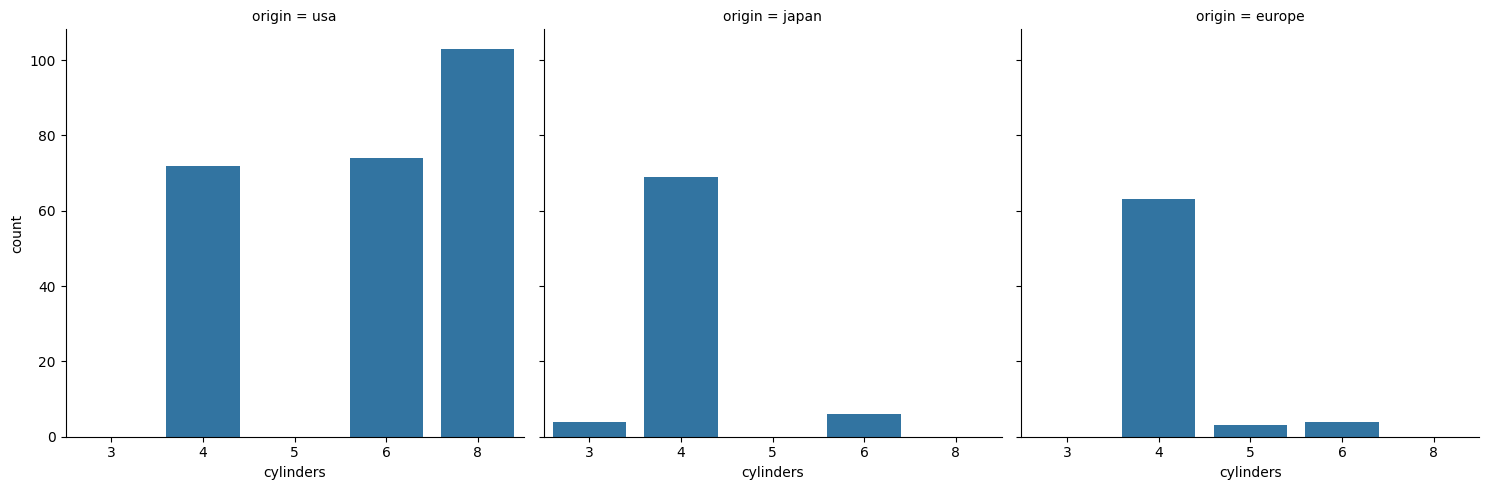

In [135]:
sns.catplot(data = mpg, x = 'cylinders', kind = 'count', col = 'origin')
plt.show()

## bar plot

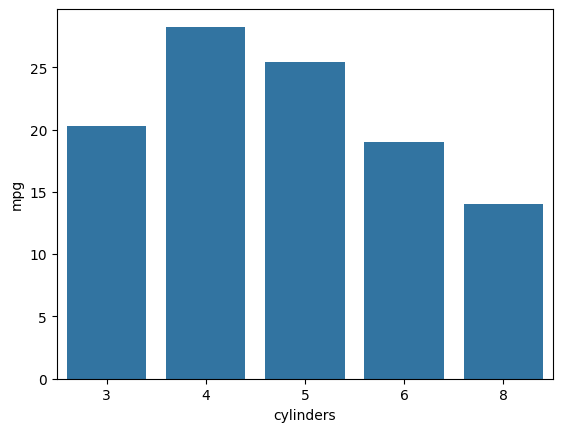

In [139]:
# 실린더 개수별 연비 중위값
sns.barplot(data = mpg, x = 'cylinders', y = 'mpg', estimator = 'median', errorbar = None)
plt.show()

In [141]:
mpg.groupby(by = ['cylinders']).mpg.median()

,mpg
cylinders,
3,20.25
4,28.25
5,25.40
6,19.00
8,14.00


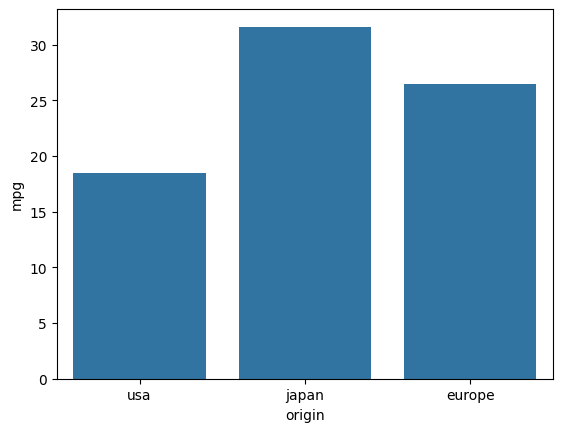

In [140]:
# 지역별 연비 중위값
sns.barplot(data = mpg, x = 'origin', y = 'mpg', estimator = 'median', errorbar = None)
plt.show()

In [143]:
mpg.groupby(by = ['origin']).mpg.median()

,mpg
origin,
europe,26.5
japan,31.6
usa,18.5


In [146]:
mpg.groupby(by=['origin', 'cylinders'], observed = True).mpg.median()

origin  cylinders
europe  4            27.00
        5            25.40
        6            16.75
japan   3            20.25
        4            32.00
        6            23.10
usa     4            27.00
        6            19.00
        8            14.00
Name: mpg, dtype: float64

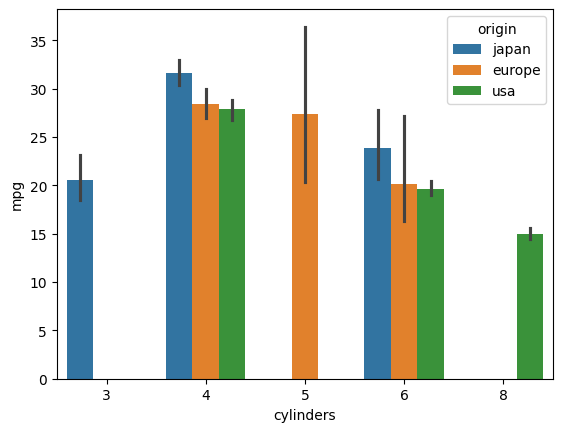

In [147]:
sns.barplot(data = mpg, x = 'cylinders', y = 'mpg', hue = 'origin')
plt.show()

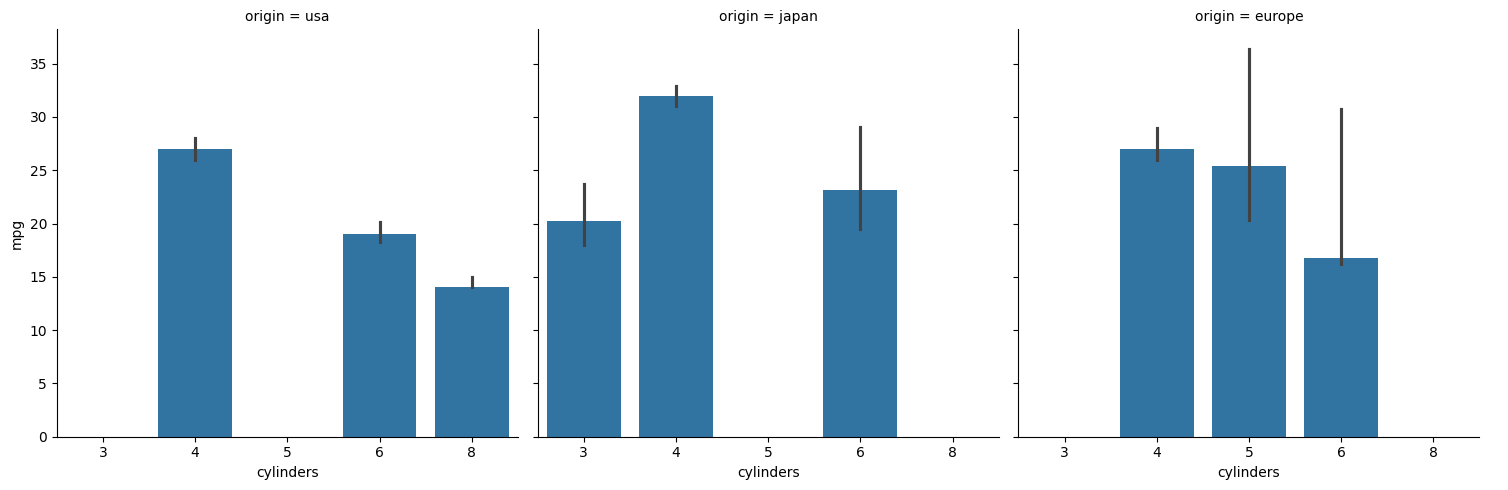

In [149]:
sns.catplot(data = mpg, x = 'cylinders', y = 'mpg', kind = 'bar', estimator = 'median', col = 'origin')
plt.show()

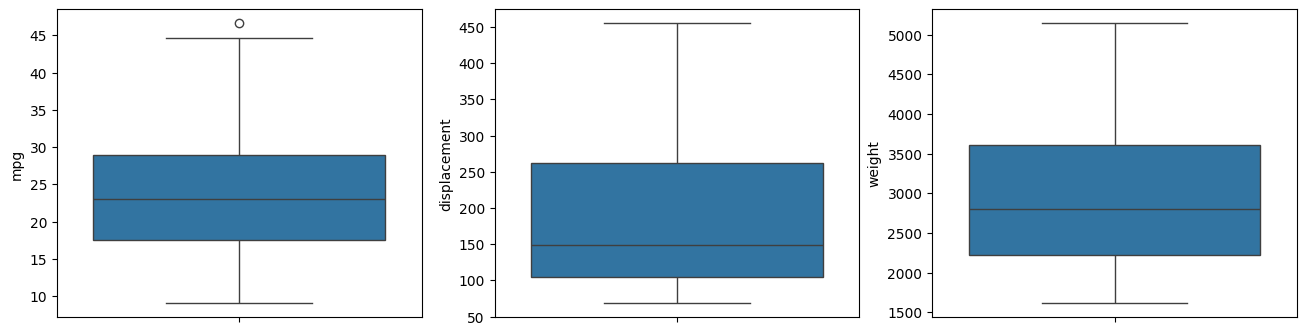

In [166]:
#3개의 subplot을 생성
#mpg, displacement, weight box plot

fig , axes = plt.subplots(ncols = 3, figsize = (16,4))

# sns.boxplot(data = mpg, y = 'mpg', ax = axes[0])
# sns.boxplot(data = mpg, y = 'displacement', ax = axes[1])
# sns.boxplot(data = mpg, y = 'weight', ax = axes[2])

mdw = mpg.columns[[0,2,4]]

for i, m in enumerate(mdw):
    sns.boxplot(data = mpg, y = m, ax = axes[i])




plt.show()

### 지역별 mpg의 box plot

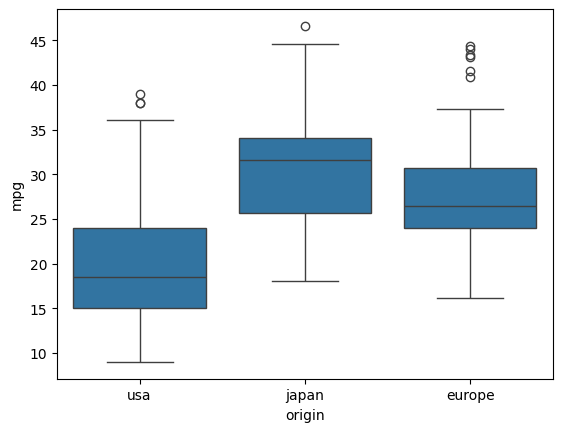

In [167]:
sns.boxplot(data = mpg, x = 'origin', y ='mpg')
plt.show()

### 실린더 개수별 mpg의 box plot

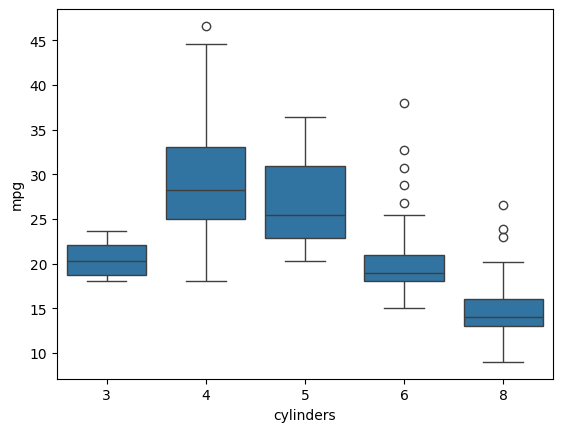

In [168]:
sns.boxplot(data = mpg, x = 'cylinders', y = 'mpg')
plt.show()

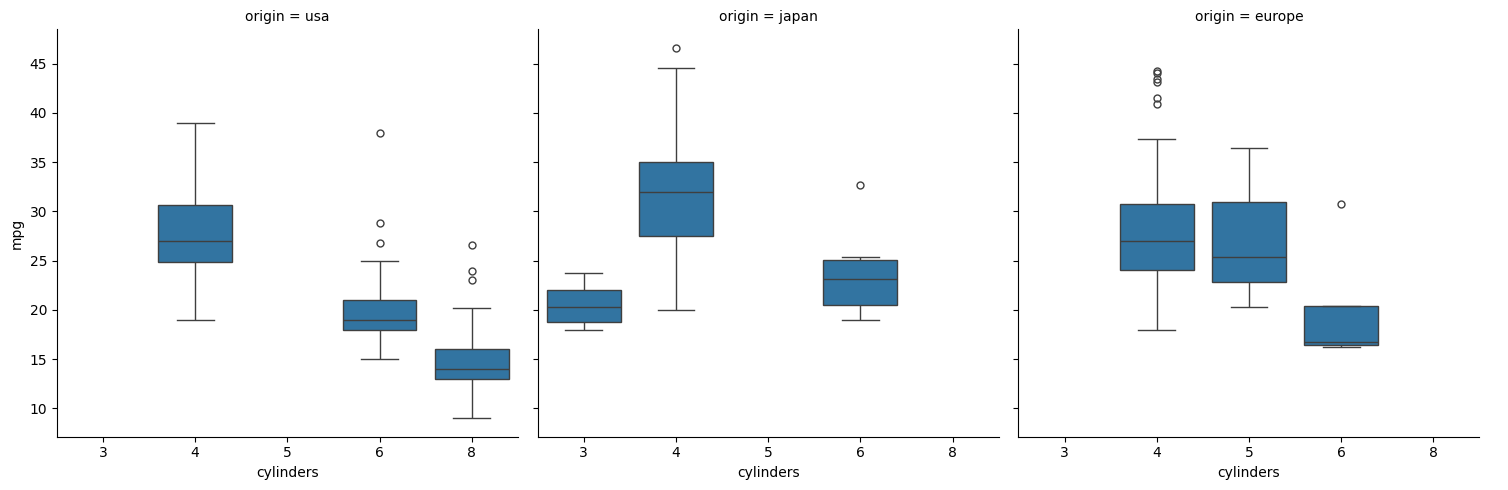

In [172]:
sns.catplot(data = mpg, x = 'cylinders', y = 'mpg', kind = 'box', col = 'origin')
plt.show()

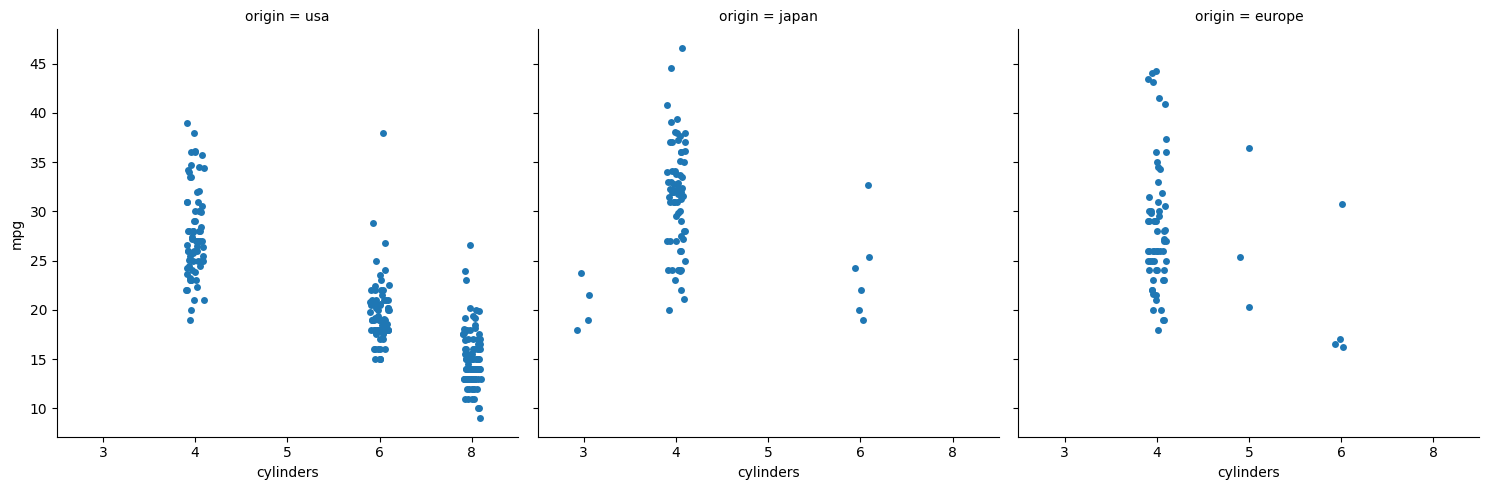

In [174]:
sns.catplot(data = mpg, x = 'cylinders', y = 'mpg', col = 'origin')     # kind = 'strip' 기본값
plt.show()

In [176]:
mpg.groupby(by = ['origin', 'cylinders']).mpg.describe()

count       mean       std   min     25%    50%     75%  \
origin cylinders                                                            
europe 4           63.0  28.411111  6.442503  18.0  24.000  27.00  30.750   
       5            3.0  27.366667  8.228204  20.3  22.850  25.40  30.900   
       6            4.0  20.100000  7.074367  16.2  16.425  16.75  20.425   
japan  3            4.0  20.550000  2.564501  18.0  18.750  20.25  22.050   
       4           69.0  31.595652  5.435787  20.0  27.500  32.00  35.000   
       6            6.0  23.883333  4.951936  19.0  20.500  23.10  25.100   
usa    4           72.0  27.840278  4.549560  19.0  24.875  27.00  30.600   
       6           74.0  19.663514  3.374992  15.0  18.000  19.00  20.950   
       8          103.0  14.963107  2.836284   9.0  13.000  14.00  16.000   

                   max  
origin cylinders        
europe 4          44.3  
       5          36.4  
       6          30.7  
japan  3          23.7  
       4          46.6  
       6          32.7  
usa    4          39.0  
       6          38.0  
       8          26.6

## histogram

<Axes: xlabel='model_year', ylabel='Count'>

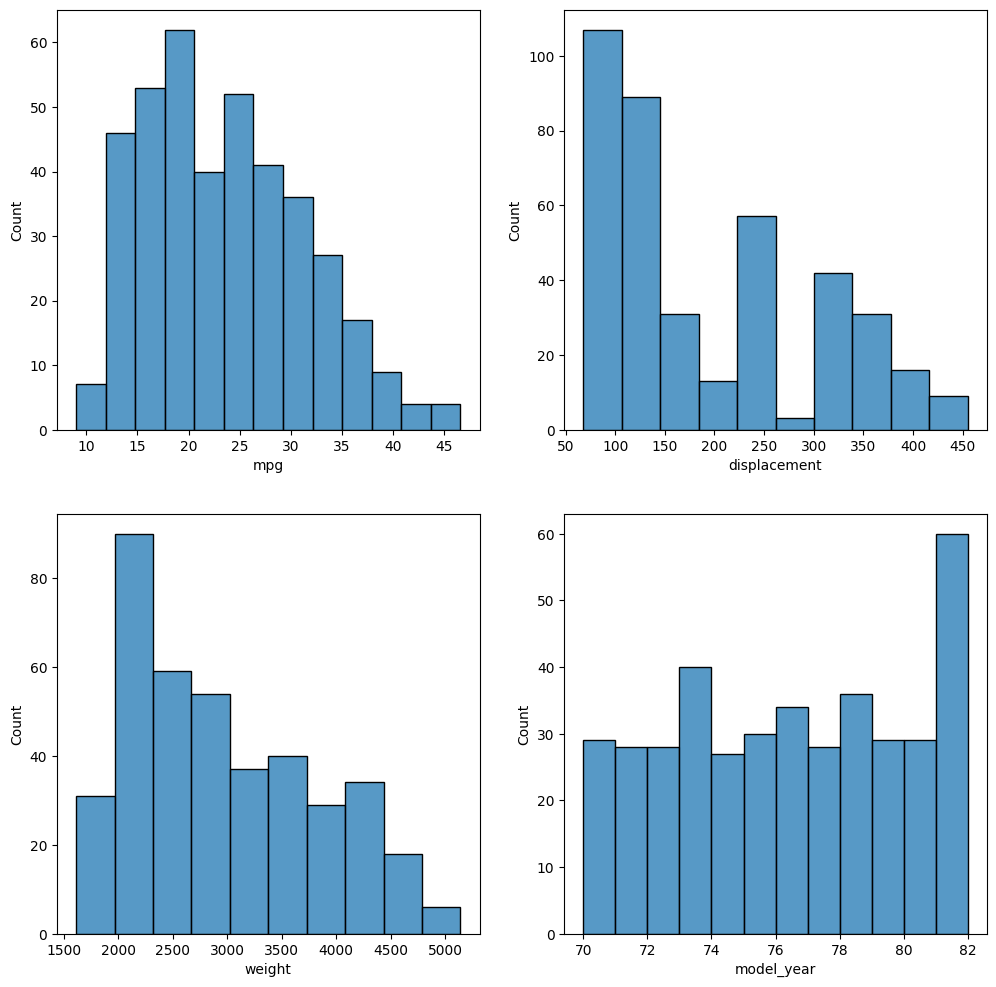

In [184]:
#4개 히스토그램 생성

fix, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

sns.histplot(data = mpg, x = 'mpg', ax = axes[0,0])
sns.histplot(data = mpg, x = 'displacement', ax = axes[0,1])
sns.histplot(data = mpg, x = 'weight', ax = axes[1,0])
sns.histplot(data = mpg, x = 'model_year', ax = axes[1,1], bins = np.arange(70,83))


## pair plot

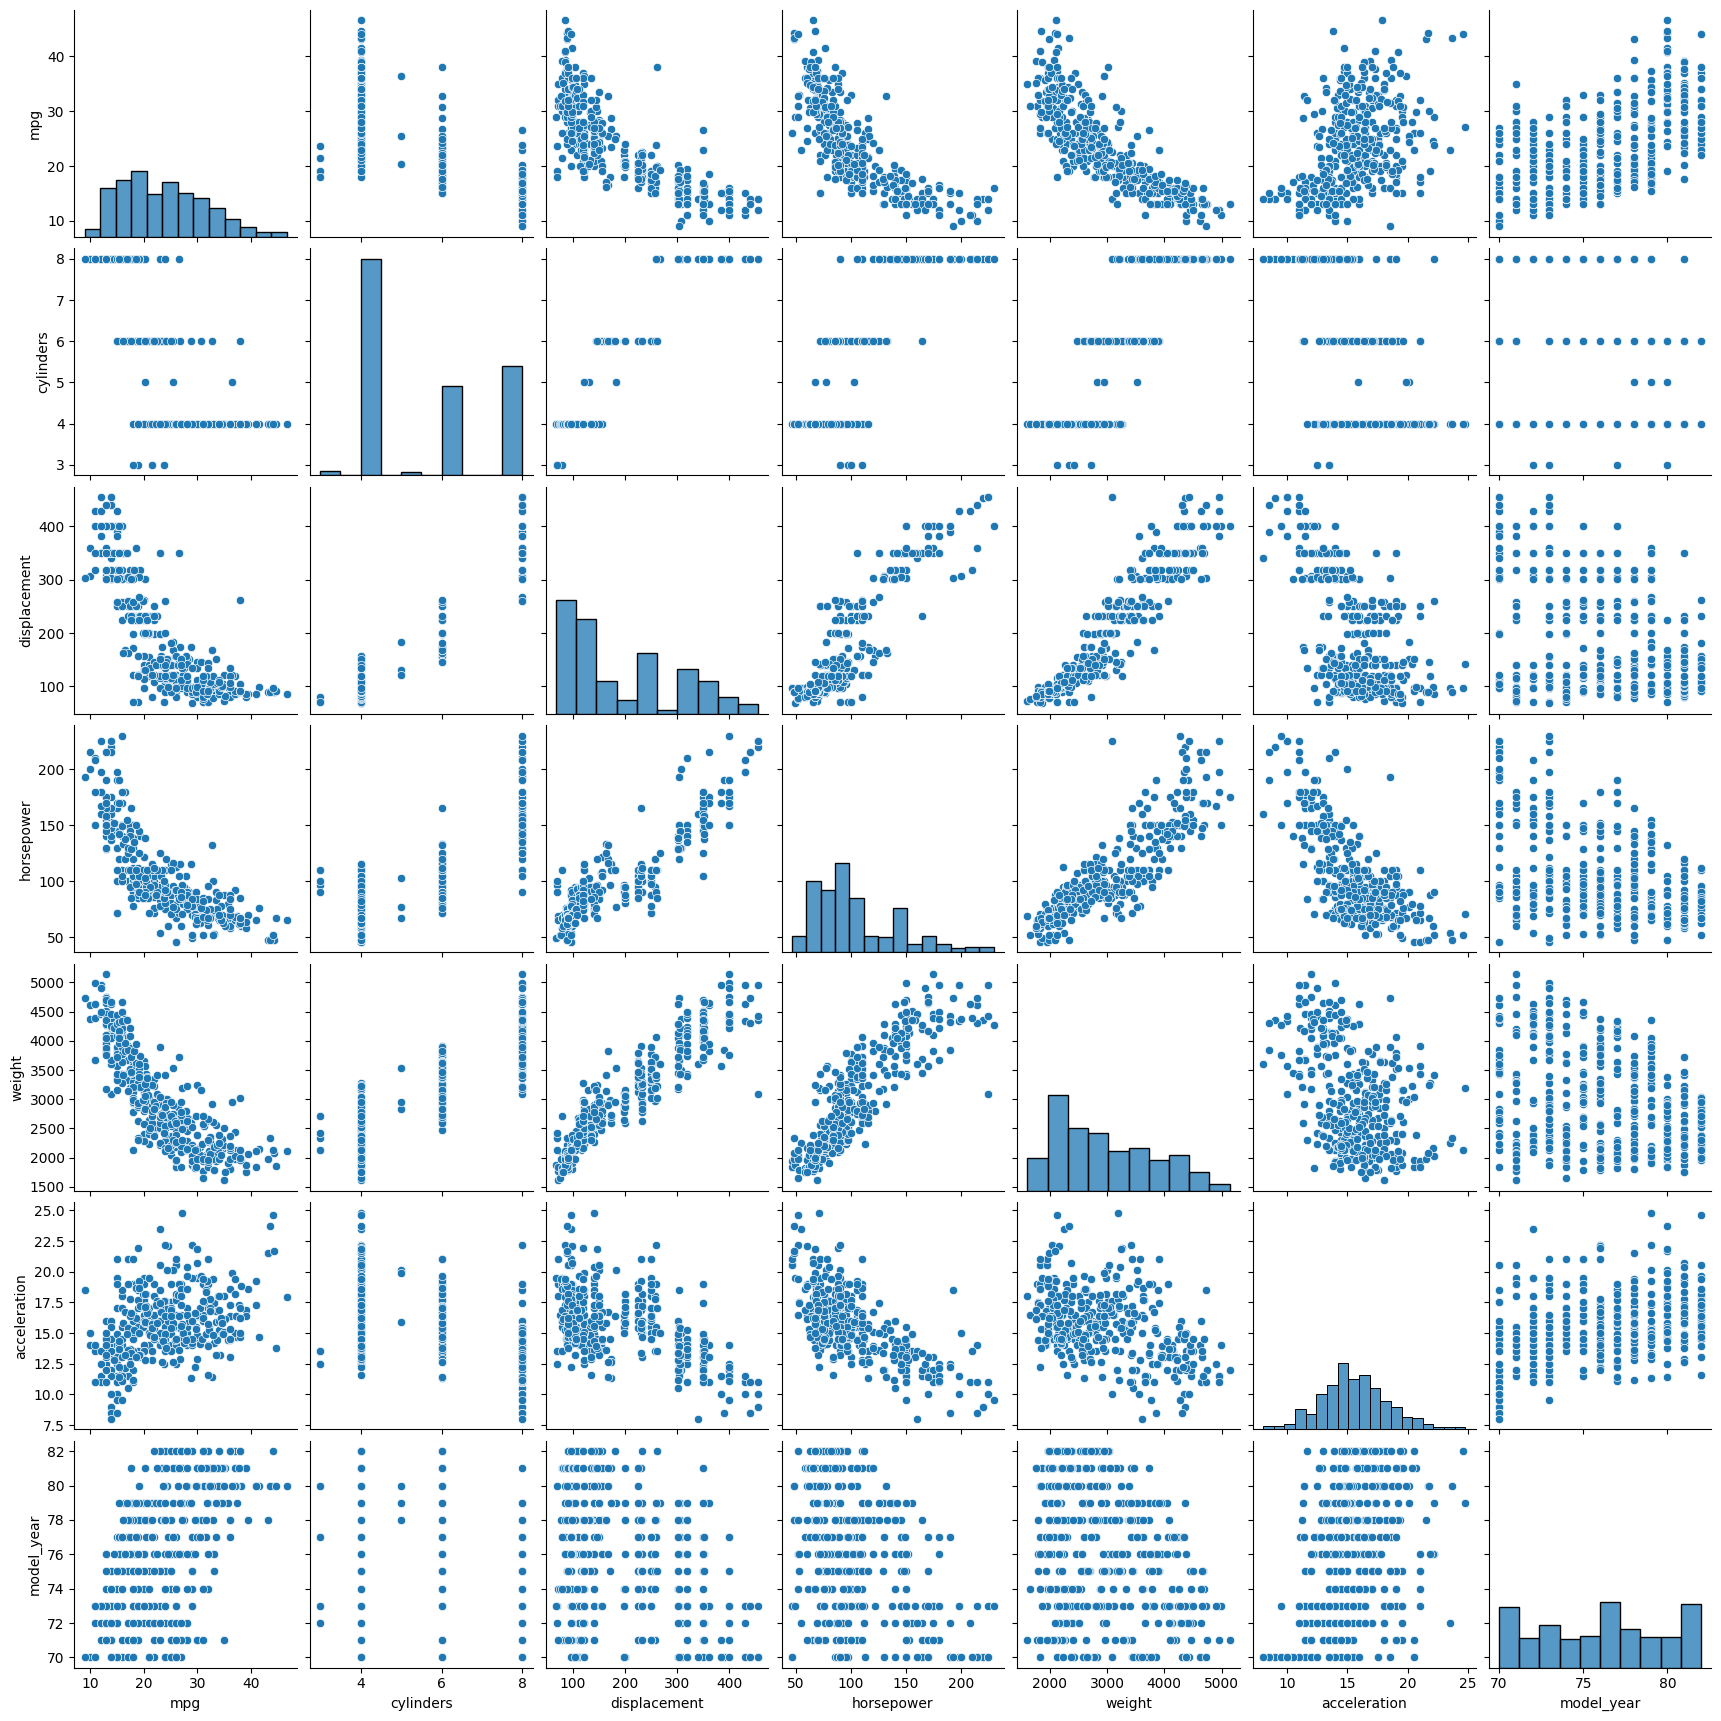

In [187]:
sns.pairplot(data = mpg)
plt.show()

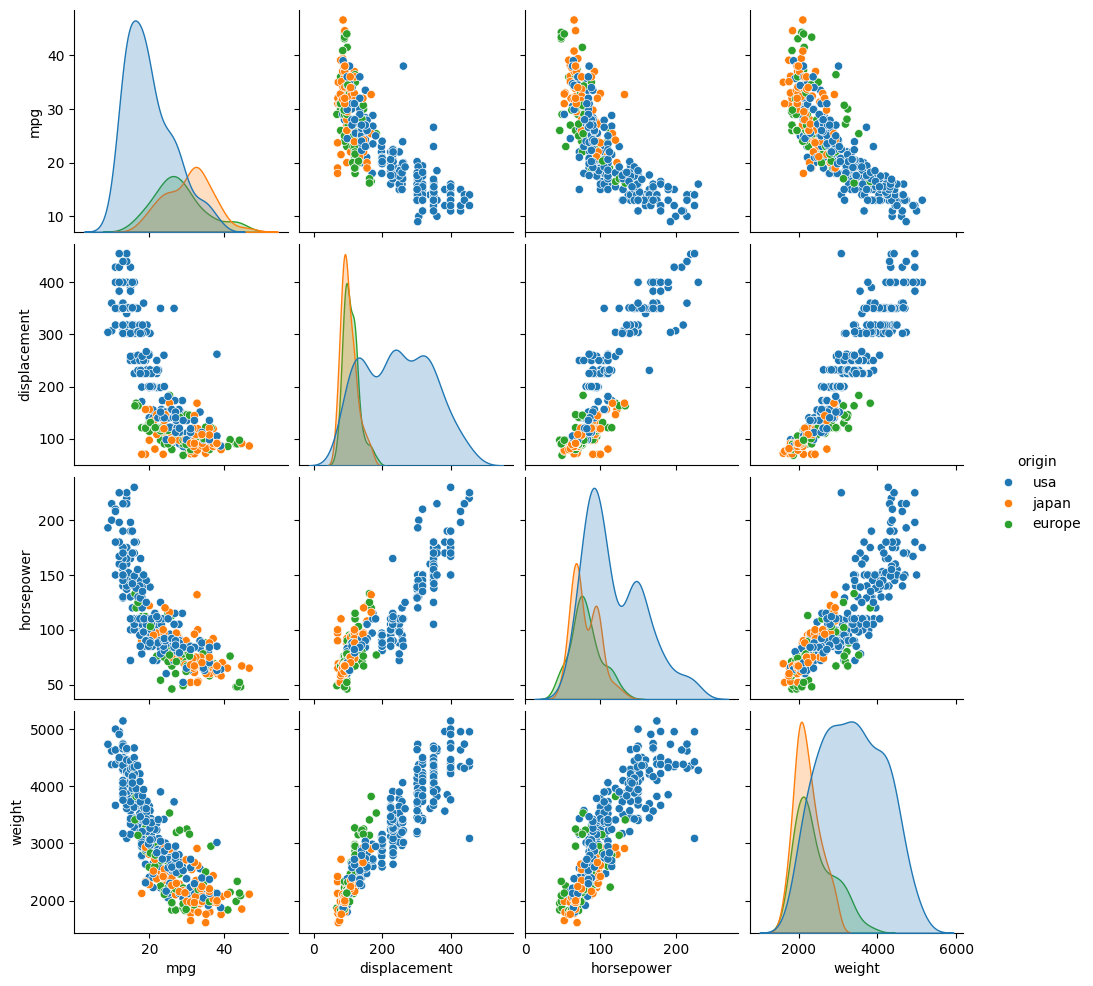

In [190]:
sns.pairplot(data=mpg, vars = ['mpg','displacement','horsepower','weight'], hue = 'origin')
plt.show()